# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

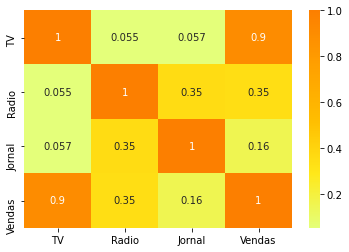

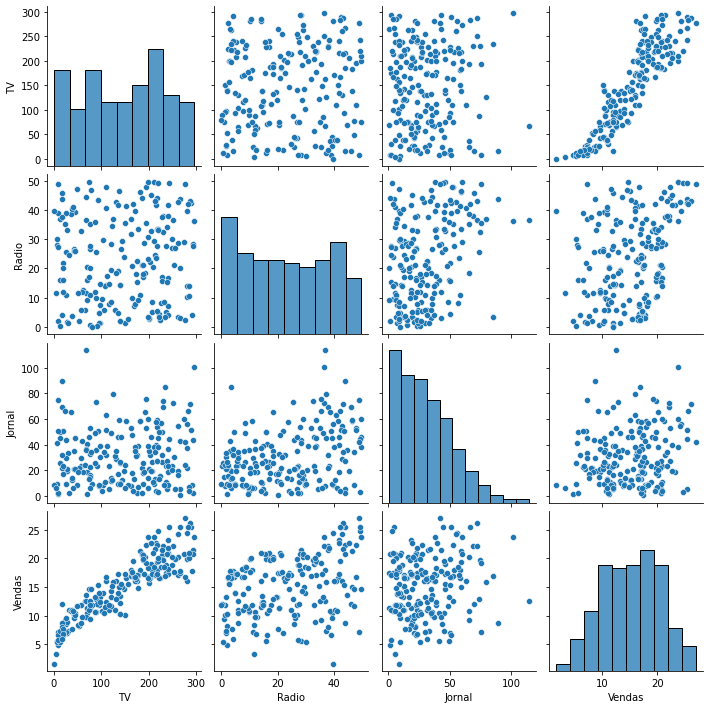

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
plt.show()

sns.pairplot(tabela)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [9]:
from sklearn.model_selection import train_test_split

# separar as informações em x e y

# y é quem a gente quer descobrir
y = tabela["Vendas"]

# x é o resto
X = tabela.drop("Vendas", axis=1)

# aplicar o train test split
x_treino, x_test, y_treino, y_teste = train_test_split(X, y, random_state=1, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_randomforest = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [12]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_randomforest = modelo_randomforest.predict(x_test)

from sklearn import metrics

# R2 vai de 0% a 100%, quanto maior melhor!
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_randomforest))

0.9071151423684273
0.9640129356112302


#### Visualização Gráfica das Previsões

<function matplotlib.pyplot.show(close=None, block=None)>

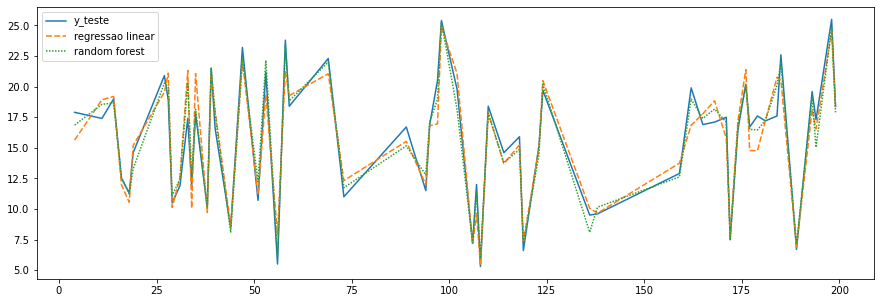

In [14]:
# Randomforest é o melhor
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["regressao linear"] = previsao_regressaolinear
tabela_auxiliar["random forest"] = previsao_randomforest

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show


#### Qual a importância de cada variável para as vendas?

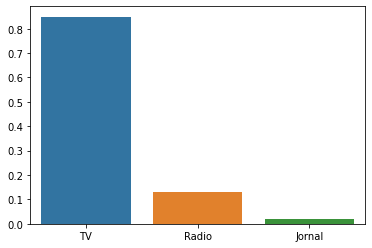

In [16]:
sns.barplot(x=x_treino.columns, y=modelo_randomforest.feature_importances_)
plt.show()

# importar a nova tabela com o pandas (a nova tabela tem que ter os dados de TV, RÁDIO E JORNAL)

#previsao = modelo_randomforest.predict(nova_tabela)
#print(previsao)